## This notebook contains solutions to exercises 1, 2, 3, 10, 12 in Data analysis recipies: Fitting a model to data by David Hogg, Jo Bovy, and Dustin Lang.

In [1]:
# general imports for all coming exercises
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

# Set new color cycler
from cycler import cycler
import matplotlib as mpl
import plotly.express as px

# Types
from typing import TypeAlias
Matrix: TypeAlias = np.ndarray
Vector: TypeAlias = np.ndarray

# Set plotly color cycler and use tex for text
mpl.rcParams["axes.prop_cycle"] = cycler(color=px.colors.qualitative.Plotly)
mpl.rcParams["text.usetex"] = True

# Exercise 1: 
Use the standard linear algebra from Section 1. to fit the straight line $y = mx + b$ to the $x$, $y$, and $sigma_y$ values provided in the file `hogg-table1.txt`. We ignore the first four data points in the table.

In [2]:

TABLE_FILE = Path("hogg-table1.txt")
table = np.loadtxt(TABLE_FILE, usecols=(1, 2, 3, 4, 5), unpack=True)


We start by aranging the data in the table in to the vectors/matrices:
\begin{align*}
    \boldsymbol{Y} &= \begin{bmatrix}
        y_1 \\
        y_2 \\
        \dots \\ 
        y_N
    \end{bmatrix}, \\
    \boldsymbol{A} &= \begin{bmatrix}
        1 & x_1 \\
        1 & x_2 \\
        1 & \dots \\ 
        1 & x_N
    \end{bmatrix}, \\
        \boldsymbol{C} &= \begin{bmatrix}
        \sigma^2_{y_1} & 0 & \dots & 0 \\
        0 &  \sigma^2_{y_2} & \dots & 0 \\
        & & \dots & & \\
        0 & 0 & \dots & \sigma^2_{y_N} \\
    \end{bmatrix}
\end{align*}

In [3]:
X, Y, sigma_y = table[:, 5:][0:3] # columns for x, y, and sigma_y

A = np.vstack([np.ones(len(X)), X]).T
C = np.diag(sigma_y**2)

We can then solve the normal equations:

\begin{align*}
    \begin{bmatrix}
        b \\ m
    \end{bmatrix}
     = \boldsymbol{X} = \left[ \boldsymbol{A}^{\mathrm{T}}  \boldsymbol{C}^{\mathrm{-1}} \boldsymbol{A} \right]^{-1} \left[ \boldsymbol{A}^{\mathrm{T}}  \boldsymbol{C}^{\mathrm{-1}} \boldsymbol{Y} \right]
\end{align*}

In [4]:
def solve_normal_equations(A: Matrix, C: Matrix, Y: Vector) -> Vector:
    """Solves the equation X = [A^T C^{-1} A]^{-1} [A^T C^{-1} Y]."""
    C_inv = np.linalg.inv(C)
    sigma_inv = np.linalg.inv(A.T @ C_inv @ A)
    return sigma_inv @ (A.T @ C_inv @ Y)
    

In [5]:
b, m = solve_normal_equations(A, C, Y)
b, m

(34.845941313398725, 2.2325362169534166)

This gives us our fits for $b$ and $m$. To get the uncertianties (standard deviation) of these variables, we compute $\sigma_{\boldsymbol{X}}^2 = \mathrm{Diag} \left[ \boldsymbol{A}^{\mathrm{T}}  \boldsymbol{C}^{\mathrm{-1}} \boldsymbol{A} \right]^{-1}$

In [6]:
def get_sigma_X(A: Matrix, C: Matrix) -> Vector:
    """Computes the uncertianty of the variables fit."""
    C_inv = np.linalg.inv(C)
    sigma_inv = np.linalg.inv(A.T @ C_inv @ A)
    return np.sqrt(sigma_inv.diagonal())

In [7]:
sigma_m, sigma_b = get_sigma_X(A, C)
sigma_m, sigma_b

(18.42264040708828, 0.11031991507180255)

We plot the data and the best fit line $y = mx + b$ along with the uncertianties in $m$ and $b$:

Text(0, 0.5, '$y$')

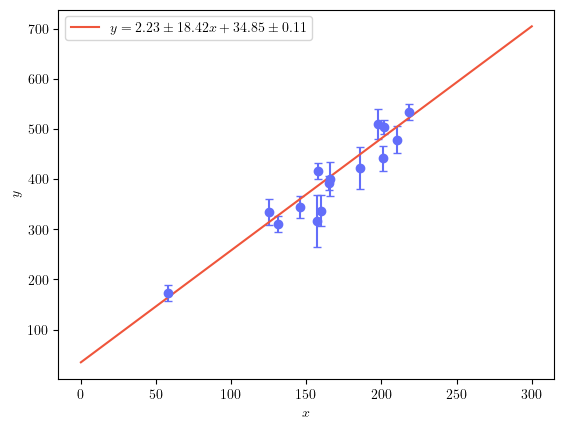

In [8]:
x = np.linspace(0, 300, 20) 
y_hat = m * x + b # best fit line

plt.errorbar(X, Y, yerr=sigma_y, fmt="o", capsize=3)
plt.plot(x, y_hat, label=rf"$y = {{{m:.2f}}} \pm {{{sigma_m:.2f}}}x + {b:.2f} \pm {{{sigma_b:.2f}}}$")
plt.legend()
plt.xlabel("$x$")
plt.ylabel("$y$")

## Exercise 2:

We repeat the above calculating but for all the data points in the original table

In [9]:
X, Y, sigma_y = table[0:3]
A = np.vstack([np.ones(len(X)), X]).T
C = np.diag(sigma_y**2)

b, m = solve_normal_equations(A, C, Y)
b, m

(213.2734919759614, 1.0767475241683258)

In [10]:
sigma_b, sigma_m = get_sigma_X(A, C)
sigma_b, sigma_m

(14.39403310716221, 0.0774067831657561)

Text(0, 0.5, '$y$')

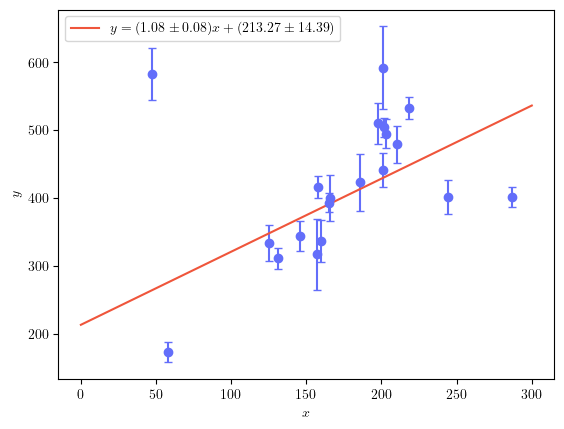

In [11]:
x = np.linspace(0, 300, 20) 
y_hat = m * x + b # best fit line

plt.errorbar(X, Y, yerr=sigma_y, fmt="o", capsize=3)
plt.plot(x, y_hat, label=rf"$y = ({{{m:.2f}}} \pm {{{sigma_m:.2f}}})x + ({b:.2f} \pm {{{sigma_b:.2f}}})$")
plt.legend()
plt.xlabel("$x$")
plt.ylabel("$y$")

The new data points are some pretty big outliers which result in half as big of a slope. 

Generalize the method of this Section to fit a general quadratic
(second order) relationship. Add another column to matrix A containing the
values x2
i , and another element to vector X (call it q). Then re-do Exercise 1
but fitting for and plotting the best quadratic relationship
g(x) = q x2 + m x + b . (8)
Your plot should end up looking like Figure 3.

## Exercise 3:
We will now repeat the fit in exercise one but with a quadratic equation on the form $g(x) = q x^2 + m x + b$. We can do so by adding another column to the matrix $\boldsymbol{A}$ which contains the $x^2$ values:

\begin{align}
    \boldsymbol{A} &= \begin{bmatrix}
        1 & x_1 & x_2 \\
        1 & x_2 & x_2 \\
        1 & \dots & \dots \\ 
        1 & x_N & x_2
    \end{bmatrix}. \\
\end{align}

Solving the normal equations now give us an additional fit for $q$:

\begin{align*}
    \begin{bmatrix}
        b \\ m \\ q
    \end{bmatrix}
     = \boldsymbol{X} = \left[ \boldsymbol{A}^{\mathrm{T}}  \boldsymbol{C}^{\mathrm{-1}} \boldsymbol{A} \right]^{-1} \left[ \boldsymbol{A}^{\mathrm{T}}  \boldsymbol{C}^{\mathrm{-1}} \boldsymbol{Y} \right]
\end{align*}

In [12]:
X, Y, sigma_y = table[:, 5:][0:3]
A = np.vstack([np.ones(len(X)), X, X**2]).T
C = np.diag(sigma_y**2)

b, m, q = solve_normal_equations(A, C, Y)
b, m, q

(72.57649611682064, 1.6045304764425055, 0.002254145076158398)

We then get the uncertianties like earlier:

In [13]:
sigma_b, sigma_m, sigma_q = get_sigma_X(A, C)
sigma_b, sigma_m, sigma_q

(38.956134622701214, 0.5818712155922691, 0.002050669814280644)

Text(0, 0.5, '$y$')

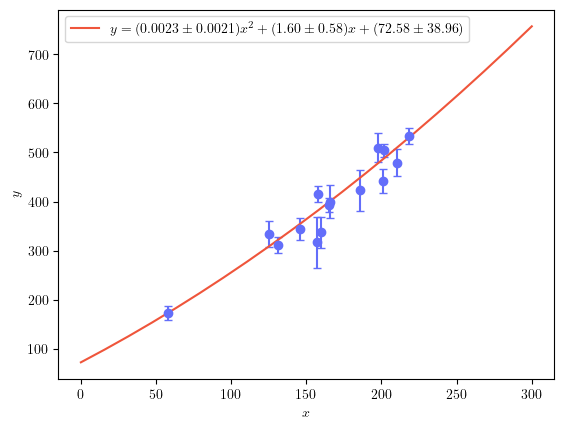

In [14]:
x = np.linspace(0, 300, 20) 
y_hat = q*x**2 + m * x + b # y_hat is now a quadratic equation instead of the linear

plt.errorbar(X, Y, yerr=sigma_y, fmt="o", capsize=3)
plt.plot(x, y_hat, label=rf"$y = ({{{q:.4f}}} \pm {{{sigma_q:.4f}}})x^2 + ({{{m:.2f}}} \pm {{{sigma_m:.2f}}})x + ({b:.2f} \pm {{{sigma_b:.2f}}})$")
plt.legend()
plt.xlabel("$x$")
plt.ylabel("$y$")